# Volume 1: K-Means Clustering.
    <Sophie Gee>
    <section 3>
    <10/12/21>

In [ ]:
from matplotlib import pyplot as plt
import random
import numpy as np
%matplotlib inline

In [ ]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [ ]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.cluster= n_clusters
        self.max = max_iter
        self.tolerance = tol
        self.norm=p
        self.normalize=normalize
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        row_size = len(X)
        centers = []
        clusters={i:[] for i in range(self.cluster)}
        rows_chosen=[]
        cluster_index={i:[] for i in range(self.cluster)}
        
        while len(rows_chosen) != self.cluster:
            rand_int = random.randrange(0,row_size)
            if rand_int not in rows_chosen:
                centers.append(X[rand_int])
                rows_chosen.append(rand_int)
        for i in range(self.max):
            for j in range(row_size):
                
                    
                distance = np.array([np.linalg.norm(X[j]-center, ord=self.norm) for center in centers])
                ind = np.argmin(distance)
                clusters[ind].append(X[j])
                cluster_index[ind].append(j)
            bool_vals=[]
            new_centers=[]
            for k in range(self.cluster):
                if clusters[k] == []:
                    while True:
                        new_rand_int = random.randrange(0, len(X))
                        if new_rand_int not in rows_chosen:
                            clusters[k] = X[new_rand_int]
                            rows_chosen.append(new_rand_int)
                new_centers.append(np.mean(np.array(clusters[k]), axis=0))
                if self.normalize == True:
                    new_centers[k] = new_centers[k]/np.linalg.norm(new_centers[k])
                diff=np.linalg.norm(new_centers[k]-centers[k], ord= self.norm)
                    
                if diff <= self.tolerance:
                    bool_vals.append[True]
            if all(bool_vals):
                break
            centers=new_centers
        
        self.centers=new_centers
        self.centers_w_clusters=clusters
        self.centers_w_row_ind=cluster_index
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        list_of_ind = np.zeros(len(X))
        prediction = self.fit(X)
        for l in range(len(X)):
            key = [key for key, value in prediction.centers_w_row_ind.items() if l in value]
            list_of_ind[l] = key[0]
        return list_of_ind
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    

In [ ]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

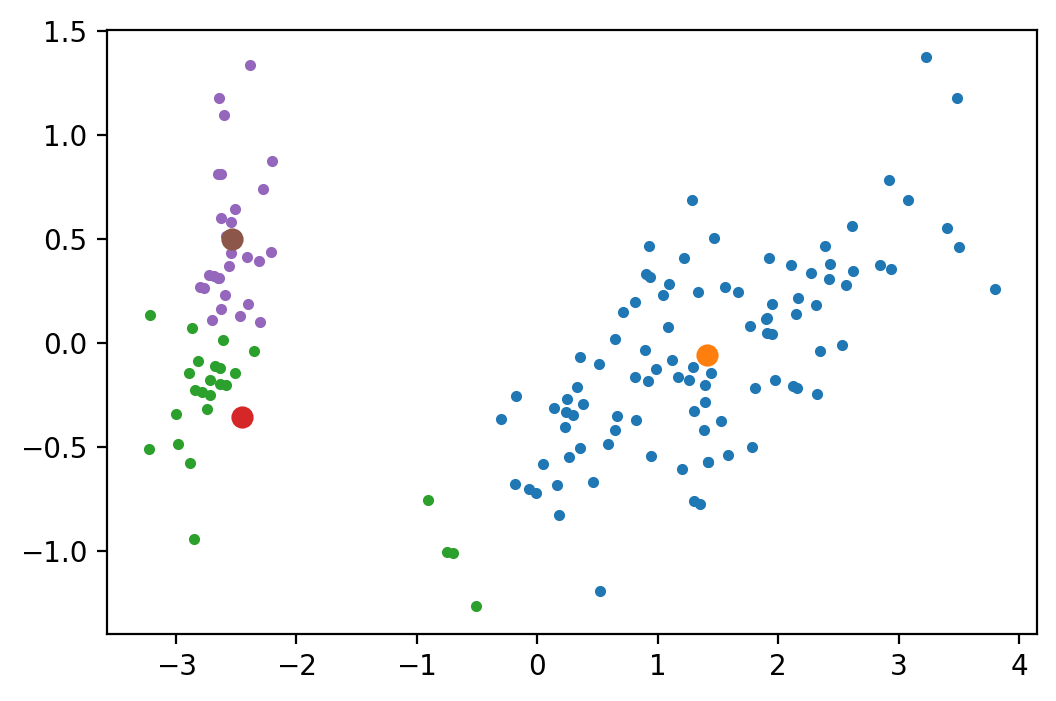

In [ ]:
k_means = KMeans(3,100)
k_means.fit(iris_data)
cluster = []
for keys in k_means.centers_w_clusters:
    center = k_means.centers[keys]
    cluster = np.stack(k_means.centers_w_clusters[keys], axis=1)
    plt.plot(cluster[0],cluster[1], '.')
    plt.plot(center[0],center[1], '.', markersize=14)
plt.show()

    

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

Give your explaination here

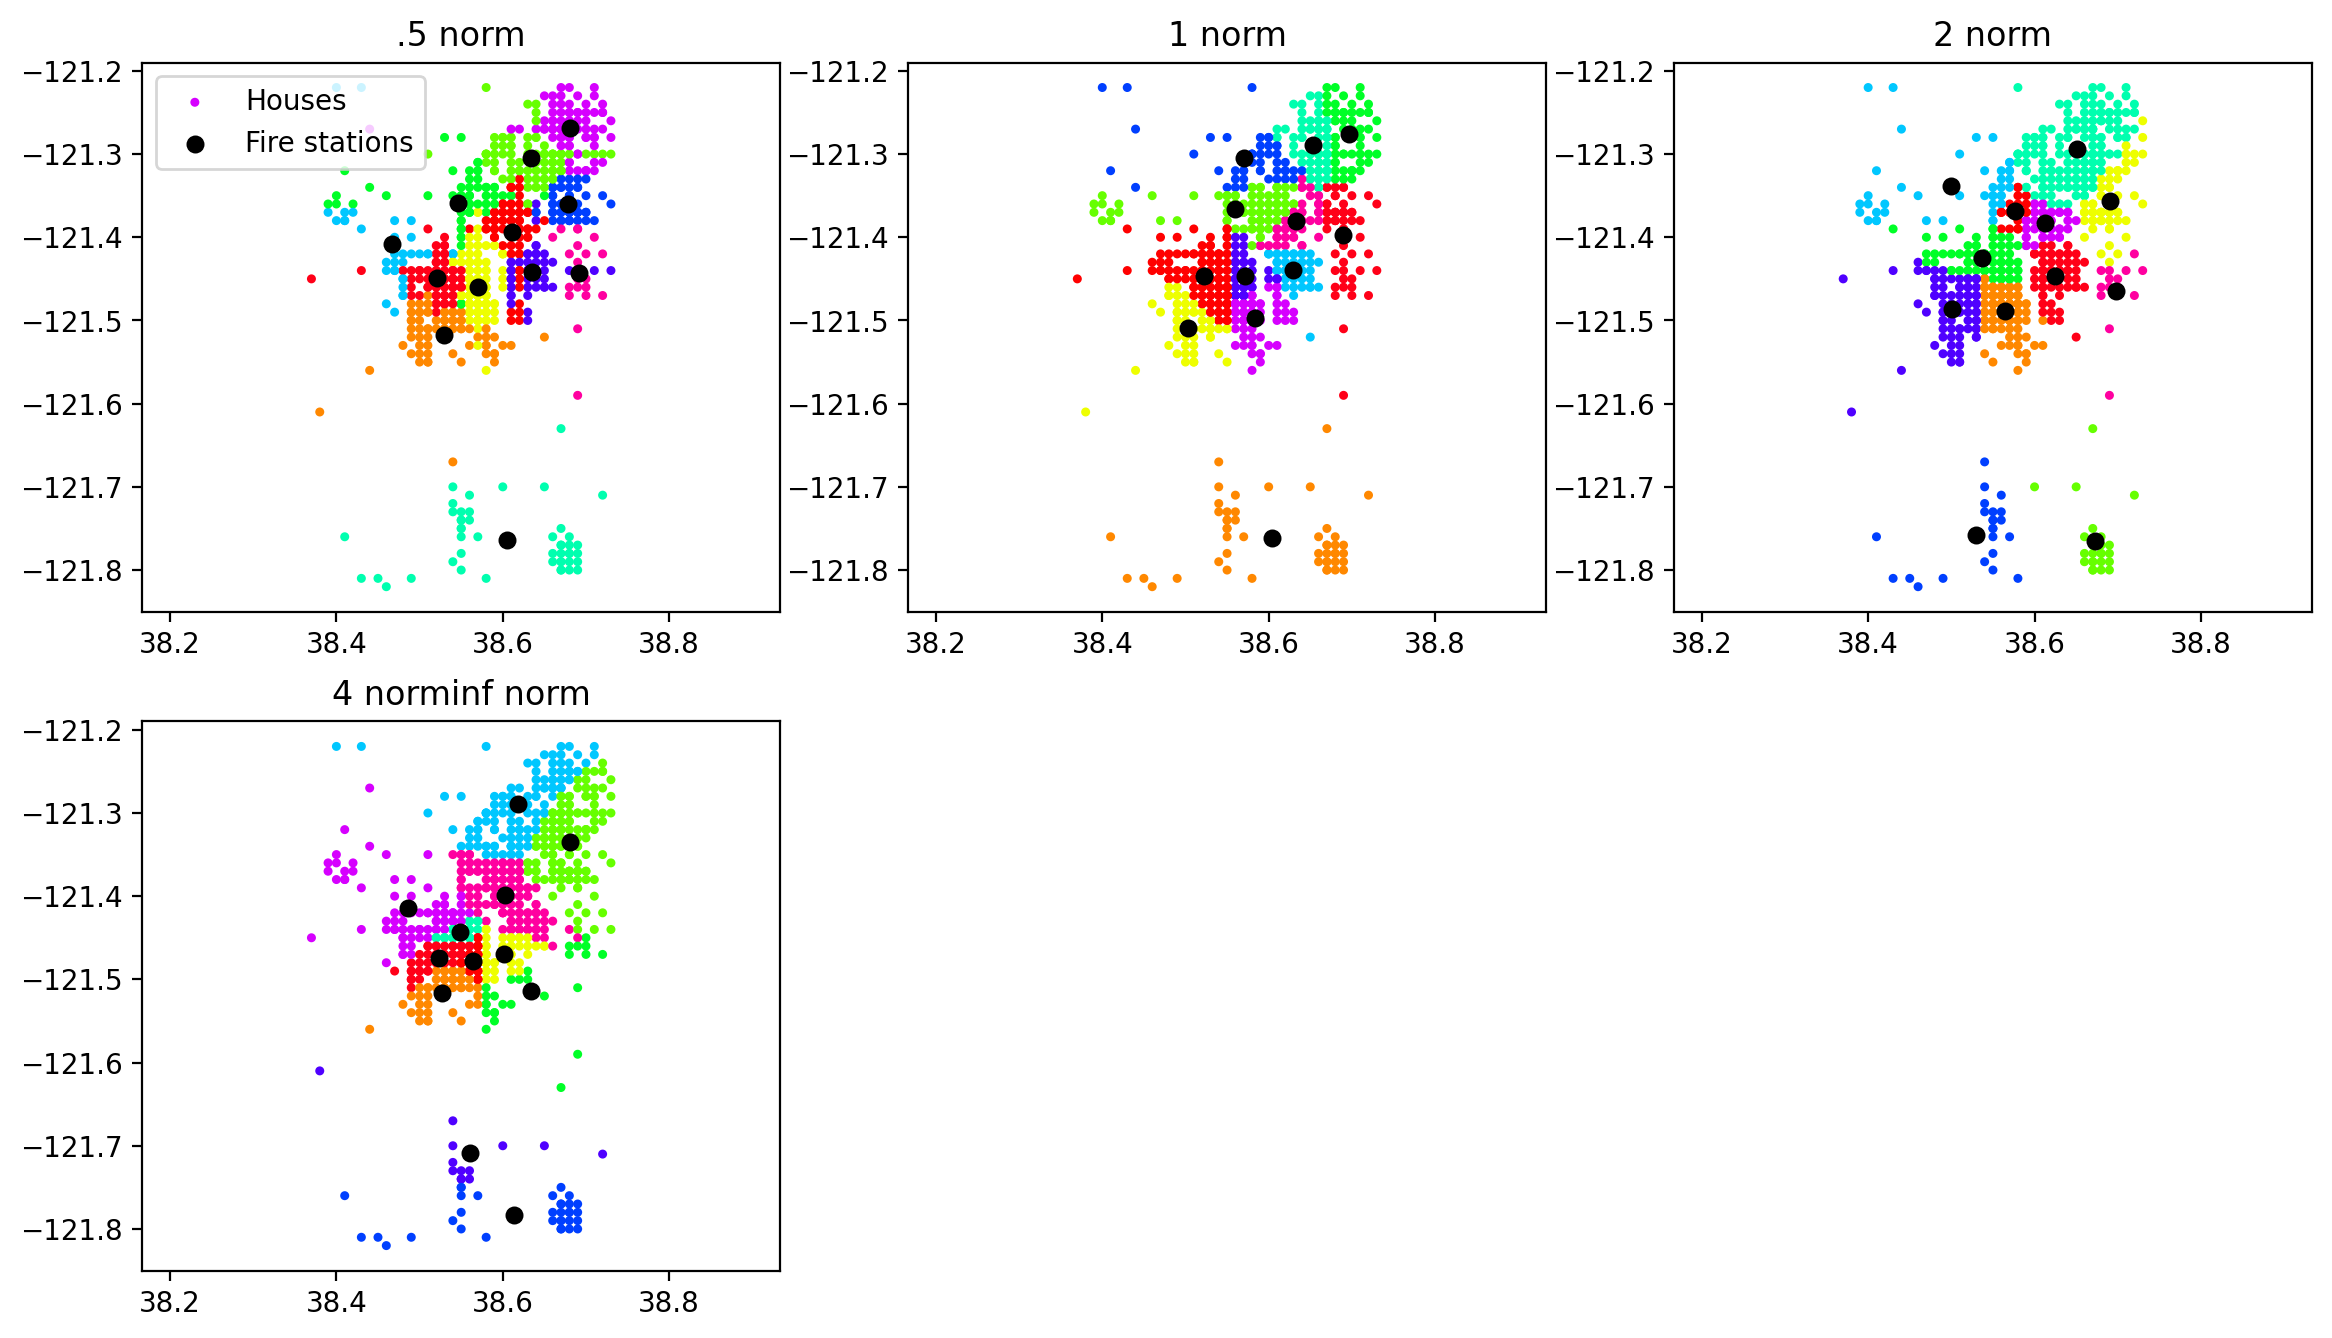

In [27]:
data = np.load("sacramento.npy")[:,6:] #setting data to sacramento

n_stations= 12 #set num of stations to 12

#formatting
graph_colors = plt.get_cmap('hsv')(np.linspace(0,1,n_stations))
titles = ['.5 norm', '1 norm', '2 norm', '4 norm' 'inf norm']
list_of_p=[0.5,1,2,4,np.inf]

all_distances = [[]]*5
plt.figure(figsize=(14,8))

#apply kmeans to sacremento
for i, (p,title) in enumerate(zip(list_of_p, titles)): #iterate
    kmeans = KMeans(n_clusters=n_stations, p=p, max_iter=300).fit(data)
    labels = kmeans.predict(data)

    #now find maximum distance compared to fire station
    distances = np.linalg.norm(data-kmeans.centers[i], ord=2, axis=1)
    max_dist = [np.max(distances[labels==j]) for j in range(n_stations)]
    all_distances[i] = max_dist

    #plot the graphs
    centers = np.array(kmeans.centers)
    plt.subplot(2,3,i+1)
    plt.scatter(data[:,0], data[:,1], c=graph_colors[labels.astype(int)], s=5, label = 'Houses')
    plt.scatter(centers[:,0], centers[:,1], c='k', s=30, label = 'Fire stations')
    plt.title(title)
    plt.axis('equal')
    if i == 0:
        plt.legend()

#display
plt.show()
    

In [ ]:
#Not too much variation amongst norms, 1/2 norm much worse at estimating than others

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

In [28]:
x_1 = np.load("earthquake_coordinates.npy")[:,0]
y_1 = np.load("earthquake_coordinates.npy")[:,1]

theta=[np.deg2rad(x) for x in x_1]
phi=[np.deg2rad(90-y) for y in y_1]
#plot x1 and y1 and long of centers and lat of centers
new_x = [np.sin(i)*np.cos(j) for i,j in zip(phi,theta)]
new_y = [np.sin(i)*np.sin(j) for i,j in zip(phi,theta)]
new_z = [np.cos(i) for i in phi]

#use column stack to put the three arrays together in one array
coordinates=np.column_stack((new_x,new_y,new_z))
kmeans = KMeans(n_clusters=15, p=2, max_iter=300, normalize=True).fit(coordinates)
labels = kmeans.predict(coordinates)

phi_of_centers = [np.arccos(center[2]) for center in kmeans.centers]
theta_of_centers = [np.arctan2(center[1],center[0]) for center in kmeans.centers]

long_of_centers = [((180*x)/np.pi) for x in phi_of_centers]
lat_of_centers= [(90-((180*y)/np.pi)) for y in theta_of_centers]

print(len(labels.astype(int)))
print(len(x_1))

plt.scatter(x_1, y_1, c=graph_colors[labels.astype(int)], s=5, label = 'Coordinates')
plt.scatter(lat_of_centers, long_of_centers, c='k', s=45, label = 'Centers')
plt.axis('equal')
plt.legend()

#display
plt.show()
print(theta)
print(phi)

9995
9995


IndexError: index 13 is out of bounds for axis 0 with size 12

<Figure size 2800x1600 with 0 Axes>

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [ ]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")